# Altair examples

By Ben Welsh

Some simple examples of working with data in the new [Altair](https://altair-viz.github.io) visualization library for Python. 

### Import Altair

It's a big hunk of Python code that implements the Vega standard for data visulization being developed at the University of Washington. It is designed to interface with pandas, so it has similar import style.

In [1]:
import altair as alt

### Import data

Altair ships with [an array of sample datasets](https://github.com/altair-viz/vega_datasets). One of them is [the list](https://github.com/altair-viz/vega_datasets/blob/master/vega_datasets/data/la-riots.csv) of L.A. riots deaths compiled by Maloy Moore.

In [3]:
from vega_datasets import data

In [6]:
df = data.la_riots()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
first_name      63 non-null object
last_name       63 non-null object
age             62 non-null float64
gender          63 non-null object
race            63 non-null object
death_date      63 non-null datetime64[ns]
address         63 non-null object
neighborhood    63 non-null object
type            63 non-null object
longitude       63 non-null float64
latitude        63 non-null float64
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 5.5+ KB


In [8]:
df.head()

,first_name,last_name,age,gender,race,death_date,address,neighborhood,type,longitude,latitude
0,Cesar A.,Aguilar,18.0,Male,Latino,1992-04-30,2009 W. 6th St.,Westlake,Officer-involved shooting,-118.273976,34.059281
1,George,Alvarez,42.0,Male,Latino,1992-05-01,Main & College streets,Chinatown,Not riot-related,-118.234098,34.062690
2,Wilson,Alvarez,40.0,Male,Latino,1992-05-23,3100 Rosecrans Ave.,Hawthorne,Homicide,-118.326816,33.901662
3,Brian E.,Andrew,30.0,Male,Black,1992-04-30,Rosecrans & Chester avenues,Compton,Officer-involved shooting,-118.215390,33.903457
4,Vivian,Austin,87.0,Female,Black,1992-05-03,1600 W. 60th St.,Harvard Park,Death,-118.304741,33.985667


### Your first charts

The different chart types in Altair as divided into "marks." The data are then "encoded" into axes. It's this easy to get started.

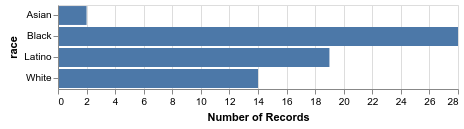

In [19]:
alt.Chart(df).mark_bar().encode(
    x="count()",
    y="race"
)

Flipping it around by switching the axes you encode.

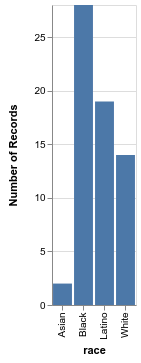

In [20]:
alt.Chart(df).mark_bar().encode(
    x="race",
    y="count()"
)

Change the chart type by changing the mark. Here's a scatter plot.

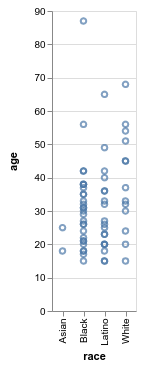

In [52]:
alt.Chart(df).mark_point().encode(
    x="race",
    y="age"
)

Here's a line chart.

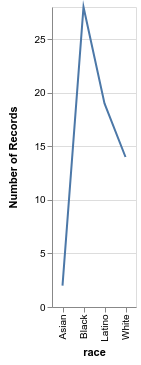

In [22]:
alt.Chart(df).mark_line().encode(
    x="race",
    y="count()"
)

### Your first legend

The "color" option lets you easisly configure the legend and coordinate colors

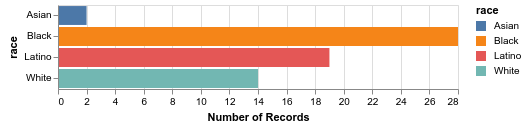

In [26]:
alt.Chart(df).mark_bar().encode(
    x="count()",
    y="race",
    color="race"
)

Break out the legend class to clean it up further

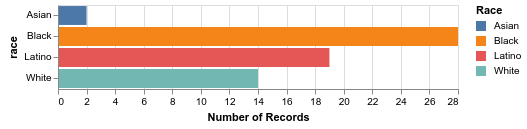

In [34]:
alt.Chart(df).mark_bar().encode(
    x="count()",
    y="race",
    color=alt.Color("race", legend=alt.Legend(title="Race"))
)

### Styling it out

You can quickly clean up with the cjart with axes options.

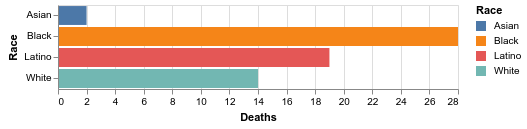

In [35]:
alt.Chart(df).mark_bar().encode(
    x=alt.X("count()", axis=alt.Axis(title="Deaths")),
    y=alt.Y("race", axis=alt.Axis(title="Race")),
    color=alt.Color("race", legend=alt.Legend(title="Race"))
)

Even add a title

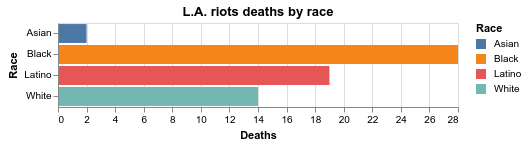

In [39]:
alt.Chart(df, title="L.A. riots deaths by race").mark_bar().encode(
    x=alt.X("count()", axis=alt.Axis(title="Deaths")),
    y=alt.Y("race", axis=alt.Axis(title="Race")),
    color=alt.Color("race", legend=alt.Legend(title="Race"))
)

And adjust the scale

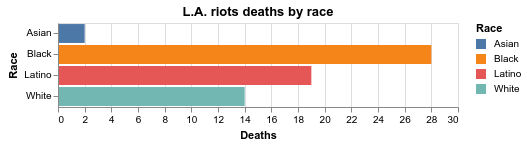

In [43]:
alt.Chart(df, title="L.A. riots deaths by race").mark_bar().encode(
    x=alt.X("count()", axis=alt.Axis(title="Deaths"), scale=alt.Scale(domain=[0, 30])),
    y=alt.Y("race", axis=alt.Axis(title="Race")),
    color=alt.Color("race", legend=alt.Legend(title="Race"))
)

Or even toss in some labels

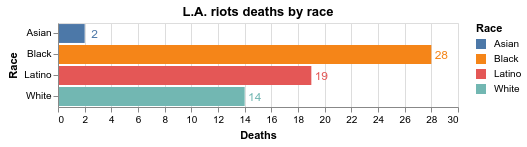

In [53]:
bars = alt.Chart(df, title="L.A. riots deaths by race").mark_bar().encode(
    x=alt.X("count()", axis=alt.Axis(title="Deaths"), scale=alt.Scale(domain=[0, 30])),
    y=alt.Y("race", axis=alt.Axis(title="Race")),
    color=alt.Color("race", legend=alt.Legend(title="Race"))
)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dx=10,
    size=12,
).encode(text='count()')

bars + text

### Other quick examples

From [the documentation](https://altair-viz.github.io/gallery/index.html)

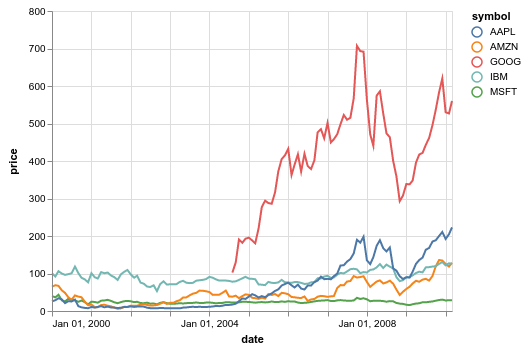

In [67]:
stocks = data.stocks()

alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

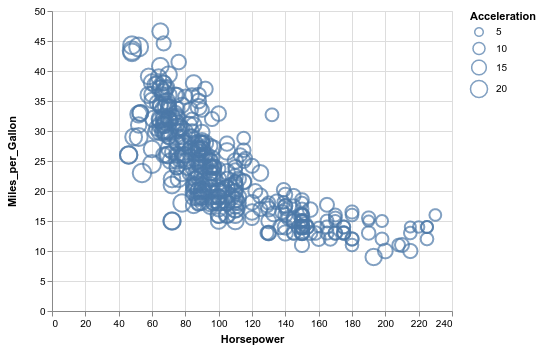

In [66]:
source = data.cars()

alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    size='Acceleration'
)

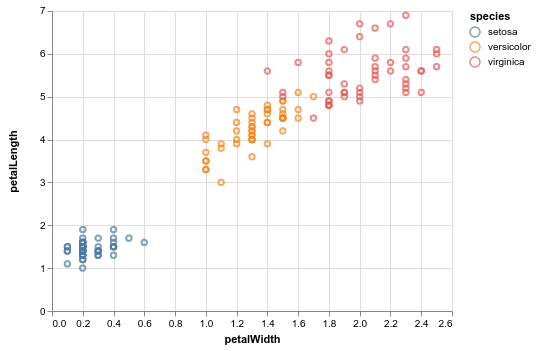

In [65]:
iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalWidth',
    y='petalLength',
    color='species'
)

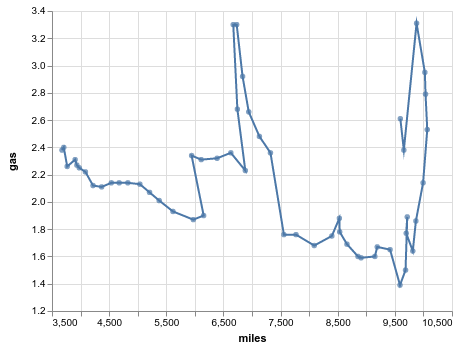

In [69]:
driving = data.driving()

lines = alt.Chart(driving).mark_line().encode(
    alt.X('miles', scale=alt.Scale(zero=False)),
    alt.Y('gas', scale=alt.Scale(zero=False)),
    order='year'
)

points = alt.Chart(driving).mark_circle().encode(
    alt.X('miles', scale=alt.Scale(zero=False)),
    alt.Y('gas', scale=alt.Scale(zero=False))
)

lines + points

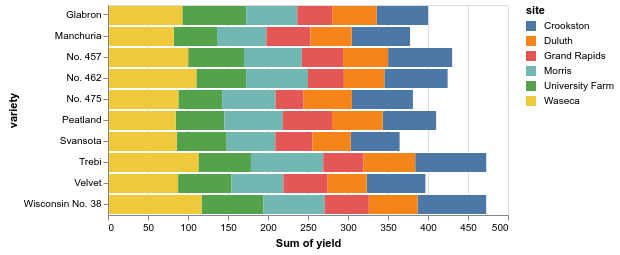

In [64]:
barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='sum(yield)',
    y='variety',
    color='site'
)

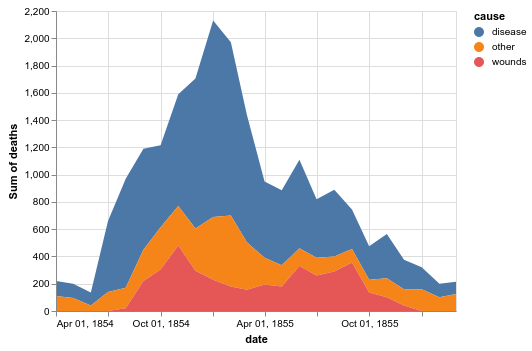

In [63]:
import pandas as pd

crimea = pd.melt(data.crimea(), id_vars=['date'],
                 value_vars=['disease', 'other', 'wounds'],
                 var_name='cause',
                 value_name='deaths')

alt.Chart(crimea).mark_area().encode(
    x='date',
    y='sum(deaths)',
    color='cause'
)

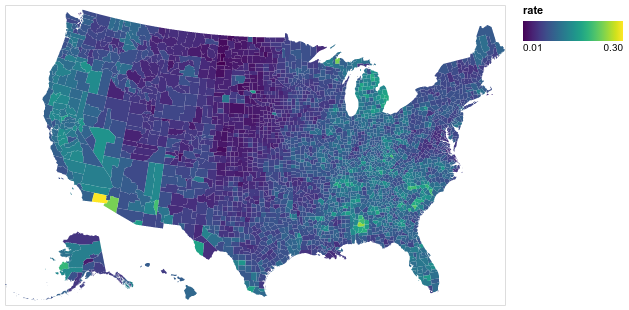

In [62]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
unemp_data = data.unemployment.url


alt.Chart(counties).mark_geoshape().properties(
    projection={'type': 'albersUsa'},
    width=500,
    height=300
).encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])
)